In [2]:
!pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 665.5 MB 22 kB/s 
     |████████████████████████████████| 1.3 MB 5.4 MB/s 
     |████████████████████████████████| 463 kB 73.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2


In [3]:
#importation des bilbliothèques

import os
import numpy as np
#import librabries
import tensorflow as tf
from tensorflow.keras import models, layers
from matplotlib import pyplot as plt
import cv2
import sys
import requests
import zipfile
import gdown
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import random
import pickle
from tqdm import tqdm
import shutil
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sn
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3

In [4]:
#telechargement de la base et autres dossiers
url = "https://drive.google.com/uc?id=1eyjVTmyeq1futykj0ZlNd92mVj87d8XK"   
output = "archiveplant.zip"
gdown.download(url, output, quiet=False)
#unzip file
!unzip "archiveplant.zip"

Downloading...
From: https://drive.google.com/uc?id=1eyjVTmyeq1futykj0ZlNd92mVj87d8XK
To: /content/archiveplant.zip
100%|██████████| 233M/233M [00:01<00:00, 120MB/s]


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: plantvillage2/Train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/68a494e1-06de-4140-9574-f1a00bf0dd0f___UF.GRC_YLCV_Lab 01874.JPG  
  inflating: plantvillage2/Train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/68bad154-c592-4710-a953-9d2abb0da397___YLCV_NREC 2680.JPG  
  inflating: plantvillage2/Train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/68e8481f-7897-407f-8dd1-f9cb722c559a___UF.GRC_YLCV_Lab 01464.JPG  
  inflating: plantvillage2/Train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6936ec65-bb87-4e0c-aec1-f446297cc41f___YLCV_NREC 2856.JPG  
  inflating: plantvillage2/Train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/693b18d9-c31e-482d-b3c4-8b85fc192ac6___YLCV_NREC 2523.JPG  
  inflating: plantvillage2/Train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6947c5a6-ee4f-4534-b5d7-c52be73af4e7___UF.GRC_YLCV_Lab 02736.JPG  
  inflating: plantvillage2/Train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6978a503-bdb6-4faa-a884-98ca3c886957_

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
IMAGE_SIZE = 299
BATCH_SIZE = 32
CHANNELS=3
EPOCHS=50


In [7]:
data_path='/content/plantvillage2'

In [8]:
#on mélange les différentes classe de notre dataset, on défini une dimension pour chaque image et on défini la taille du batch
images_dataset=tf.keras.preprocessing.image_dataset_from_directory(
 '/content/plantvillage2/Train',
 shuffle=True,
 image_size=(IMAGE_SIZE,IMAGE_SIZE),
 batch_size=BATCH_SIZE,
 
)

Found 10169 files belonging to 10 classes.


In [9]:
class_names=images_dataset.class_names
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [10]:
#on découvre notre dataset en affichant la forme d'un batches et les valeurs de labélisation numérique des différentes classe de notre dataset
for image_batch, label_batch in images_dataset.take(2):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 299, 299, 3)
[7 5 2 1 5 7 0 6 7 7 9 4 4 9 2 1 6 7 3 0 3 2 7 0 2 0 9 5 9 3 2 7]
(32, 299, 299, 3)
[6 7 0 1 5 6 1 9 0 0 6 7 6 0 7 7 9 2 7 7 7 9 7 5 9 3 0 4 7 1 5 3]


In [11]:
#print first image in that batch
for image_batch, label_batch in images_dataset.take(1):
    print(image_batch[0].numpy())

[[[159.      147.      151.     ]
  [156.64716 144.64716 148.64716]
  [159.8428  147.8428  151.8428 ]
  ...
  [173.52646 160.52646 167.52646]
  [202.82149 189.82149 196.82149]
  [144.      131.      138.     ]]

 [[170.7642  158.7642  162.7642 ]
  [169.64156 157.64156 161.64156]
  [169.65942 157.65942 161.65942]
  ...
  [159.65753 146.65753 153.65753]
  [163.30153 150.30153 157.30153]
  [151.8428  138.8428  145.8428 ]]

 [[166.31438 154.31438 158.31438]
  [191.14777 179.14777 183.14777]
  [191.595   179.595   183.595  ]
  ...
  [169.80353 156.80353 163.80353]
  [163.19315 150.19315 157.19315]
  [145.67392 132.67392 139.67392]]

 ...

 [[196.92142 186.92142 194.92142]
  [196.0755  186.0755  194.0755 ]
  [202.47778 192.47778 200.47778]
  ...
  [197.13509 186.13509 192.13509]
  [200.8495  189.8495  195.8495 ]
  [204.67386 193.67386 199.67386]]

 [[201.03998 191.03998 199.03998]
  [195.47272 185.47272 193.47272]
  [198.6379  188.6379  196.6379 ]
  ...
  [197.16847 186.16847 192.16847]
  [2

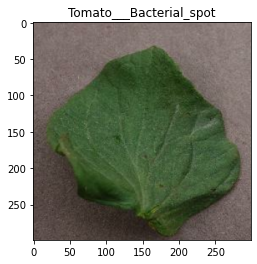

In [12]:
#visualize the first image in that batch
for image_batch, label_batch in images_dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])
    plt.axis('on')

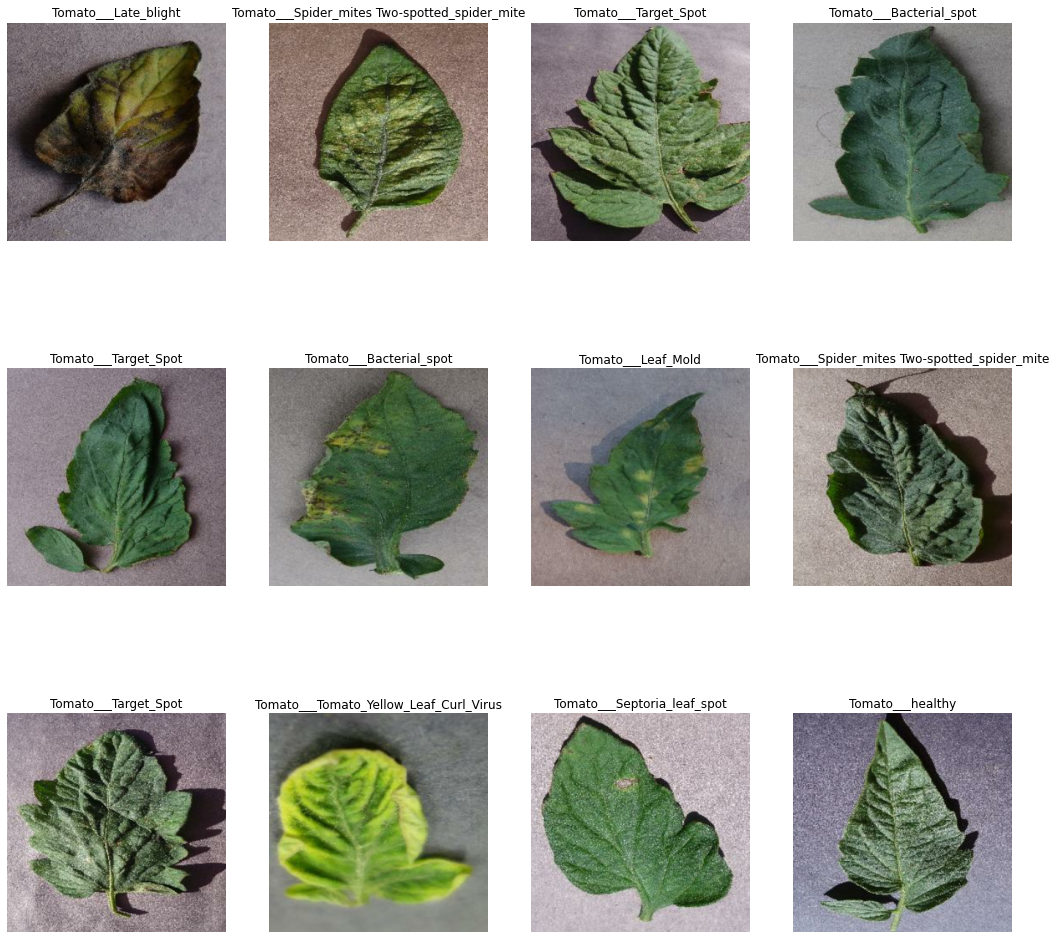

In [13]:
#visualize the first images in that batch
plt.figure(figsize=(18,18))
for image_batch, label_batch in images_dataset.take(1):
    for i in range (12):
        ax=plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [14]:
based_model=tf.keras.applications.inception_v3.InceptionV3(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

based_model.summary()

96124928/96112376 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)           

In [15]:
#bloquer le modèle de base
based_model.trainable=True

In [16]:
based_model.output

<KerasTensor: shape=(None, 1000) dtype=float32 (created by layer 'predictions')>

In [17]:
#Ajouter les couches de sortie
x=Flatten()(based_model.output)
prediction = Dense(10, activation = 'softmax')(x)


In [18]:
#creation du model global
model=Model(inputs=based_model.input,outputs=prediction)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [19]:
model.compile(  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])


In [20]:
train_dir=os.path.join(data_path, '/content/plantvillage2/Train')
test_dir=os.path.join(data_path, '/content/plantvillage2/Test')

In [21]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (299, 299),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (299, 299),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 10169 images belonging to 10 classes.
Found 4360 images belonging to 10 classes.


In [ ]:
#entrainement du model
history=model.fit(
    training_set,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=test_set,
)

Epoch 1/50
 31/159 [====>.........................] - ETA: 2:09:40 - loss: 2.2486 - accuracy: 0.4763

In [ ]:
#evaluate the model
scores = model.evaluate(test_set)

In [ ]:
scores

In [ ]:
history

In [ ]:
print(history.params)

In [ ]:
print(history.history.keys())

In [ ]:
len(history.history['accuracy'])

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

In [ ]:
#Plotting Accuracing and Loss Graph for Trained Model using Matplotlib with history call back
#plotting training and validation accuracy
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [ ]:
#sauvegarder le modèle
model.save('modele2_nn.h5')

loaded_model = tf.keras.models.load_model("modele2_nn.h5")

In [ ]:
#making predictions 
for images_batch, label_batch in test_set.take(1):
    image1=images_batch[0].numpy().astype('uint8')
    label1=label_batch[0].numpy()

    print('predicting the first image')
    plt.imshow(image1)
    print('Image1 True label:', class_names[label1])


    batch_prediction= model.predict(images_batch)
    print("Image1's predicted label:", class_names[np.argmax(batch_prediction[0])])

In [ ]:
print(len(train_ds),len(val_ds),len(test_ds))

In [ ]:
#on affiche la taille de notre dataset qui correspond au nombre de batches de notre dataset
len(images_dataset)

In [ ]:
228*64

In [ ]:
print(len(train_ds),len(val_ds),len(test_ds))

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
#resize_and_rescale=tf.keras.Sequential([
    
   # layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
   # layers.experimental.preprocessing.Rescaling(1.0/255)
#])

In [ ]:
#data_augmentation=tf.keras.Sequential([
    
   # layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
   #layers.experimental.preprocessing.RandomRotation(0.2)
#])

In [ ]:
#bloquer le modèle de base
based_model.trainable=False

In [ ]:
based_model.output

In [ ]:
model.compile(  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [ ]:
model.fit_generator(training_set, epochs=5, validation_data=test_set)

In [ ]:
valid_loss, valid_accuracy = model.evaluate_generator(test_ds)

In [ ]:
print("Accuracy after transfer learning: {}".format(valid_accuracy))